In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [11]:
#from Lusi's codes
def getData(df):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1] #assume last column is class
    return X,y

def tomeklinks(df, delete='major'):
    X,y = getData(df)
    dfclean = df.copy()
    class_count = y.value_counts()
    #make sure there are only 2 classes
    if len(class_count) != 2:
        print(f"only work on data in 2 classes. found {len(class_count)} classes instead")
        return df,[]
    major,minor = class_count.index
    #return if balanced data but delete set to "major"
    if class_count[major] == class_count[minor] and delete == 'major':
        print('balanced data so no cleaning is performed. consider setting delete to "both".')
        return df,[]

    #find tomeklinks
    nns = NearestNeighbors(n_neighbors=1).fit(X,y).kneighbors()[1]
    dictnn = {}
    links = []
    for i in range(len(nns)):
        nn = nns[i][0]
        if y[i] == y[nn]:
            continue
        if i in dictnn and nn == dictnn[i]:
            links.append((i,nn))
        dictnn[nn] = i
    # drop tomeklinks
    if delete == 'major':
        for p1,p2 in links:
            if y[p1] == major:
                pmajor = p1
            else:
                pmajor = p2
            dfclean.drop(df.index[pmajor], inplace=True)
    elif delete == 'both':
        for p1,p2 in links:
            dfclean.drop([df.index[p1],df.index[p2]], inplace=True)
    else:
        print('invalid deletion strategy. choose from "major" or "both"')
        return df,links
    
    return dfclean,links

In [12]:
np.random.seed(0)
df1 = pd.DataFrame(np.random.randint(0,70,size=(8, 2)))
df1['label'] = [0 for _ in range(len(df1))]
df2 = pd.DataFrame(np.random.randint(40,100,size=(15, 2)))
df2['label'] = [1 for _ in range(len(df2))]
dftot = pd.concat([df1,df2], ignore_index=True)
dfcleaned,links = tomeklinks(dftot)
print(links)

[(10, 0), (17, 5)]


In [13]:
dfcle_both,links_both = tomeklinks(dftot,delete='both')
print(links_both)

[(10, 0), (17, 5)]


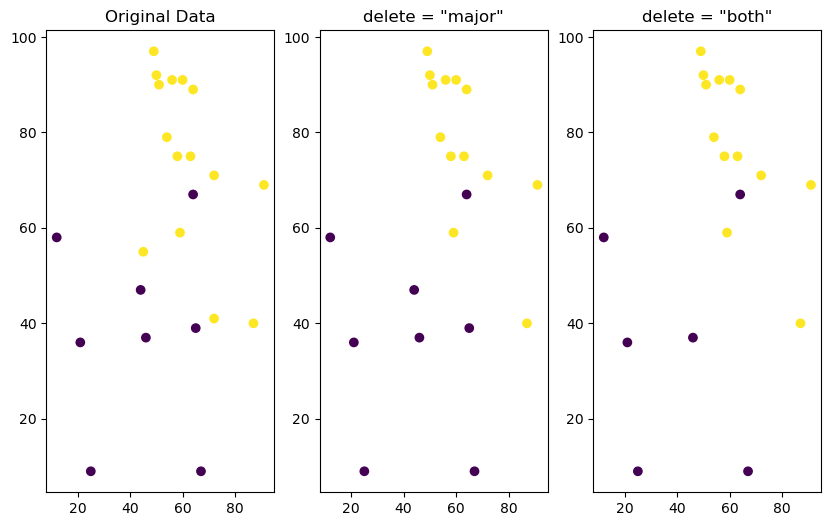

In [18]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,6))
ax1.scatter(dftot.iloc[:,0],dftot.iloc[:,1],c=dftot.iloc[:,-1])
ax2.scatter(dfcleaned.iloc[:,0],dfcleaned.iloc[:,1],c=dfcleaned.iloc[:,-1])
ax3.scatter(dfcle_both.iloc[:,0],dfcle_both.iloc[:,1],c=dfcle_both.iloc[:,-1])
ax1.title.set_text('Original Data')
ax2.title.set_text('delete = "major"')
ax3.title.set_text('delete = "both"')
plt.show()